In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import cv2

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
cwd = os.getcwd()
print(cwd)

Z:\Study\GE Project


In [3]:
wd = cwd+"\\output_images"

In [4]:
folder_list = os.listdir(wd)

In [7]:
#os.mkdir(cwd+'\\set_image')

In [5]:
#checking how many images we have in total
set_1=[]
set_2=[]
for files in os.listdir(wd):
    if files!='Random':
        for file in os.listdir(wd+'//'+files+'//set_1'):
            set_1.append(file)
    for file in os.listdir(wd+'//'+files+'//set_2'):
        set_2.append(file)

In [6]:
print("number of images in set_1 (zoomed out): ", len(set_1))
print("number of images in set_2 (zoomed in): ", len(set_2))
print("number of images total: ", len(set_1)+len(set_2))

number of images in set_1 (zoomed out):  742
number of images in set_2 (zoomed in):  1322
number of images total:  2064


In [98]:
#This cell is for using both set_1 and set_2
#finding csv files to move images from git to local and divide it into train, test, validation
# os.mkdir(cwd+'\\image_set1_set2')

#After testing, not including set_1 gave better result.

# for folder_name in folder_list:
#     folder = wd+'\\'+folder_name
#     for files in os.listdir(folder):
#         if files[-3:]=='csv':
#             continue
#         elif files=='set_2':
#             for zoom_file in os.listdir(folder+'\\'+files):
#                 if zoom_file[:-4]+'_zoom'+zoom_file[-4:] in os.listdir(cwd+'\\image_set1_set2'):
#                     continue
#                 else:
#                     copyfile(folder+'\\'+files+'\\'+zoom_file, cwd+'\\image_set1_set2\\'+zoom_file[:-4]+'_zoom'+zoom_file[-4:])
#         elif files in os.listdir(cwd+'\\image_set1_set2'):
#             continue
#         elif files=='set_1':
#             for nonzoom_file in os.listdir(folder+'\\'+files):
#                 if nonzoom_file in os.listdir(cwd+'\\image_set1_set2'):
#                     continue
#                 else:
#                     copyfile(folder+'\\'+files+'\\'+nonzoom_file, cwd+'\\image_set1_set2\\'+nonzoom_file)
#         else:
#             continue
# #             copyfile(folder+'\\'+files, cwd+'\\set_image\\'+files)

In [5]:
#finding csv files to move images from git to local and divide it into train, test, validation
# os.mkdir(cwd+'\\image')
#this cell is for only using set_2

for folder_name in folder_list:
    folder = wd+'\\'+folder_name
    for files in os.listdir(folder):
        if files[-3:]=='csv':
            continue
        elif files=='set_2':
            for zoom_file in os.listdir(folder+'\\'+files):
                if zoom_file[:-4]+'_zoom'+zoom_file[-4:] in os.listdir(cwd+'\\set_image'):
                    continue
                else:
                    copyfile(folder+'\\'+files+'\\'+zoom_file, cwd+'\\set_image\\'+zoom_file[:-4]+'_zoom'+zoom_file[-4:])
        elif files in os.listdir(cwd+'\\set_image'):
            continue
        elif files=='set_1':
            continue
        else:
            #decided to skip zoomed_out images
            continue
#             copyfile(folder+'\\'+files, cwd+'\\set_image\\'+files)

In [6]:
csv_list

['Z:\\Study\\GE Project\\output_images\\Amtrak_non_cat_2\\ANC2.csv',
 'Z:\\Study\\GE Project\\output_images\\Australia\\AUS.csv',
 'Z:\\Study\\GE Project\\output_images\\Random\\RAN.csv',
 'Z:\\Study\\GE Project\\output_images\\Amtrak_non_cat_1\\ANC.csv',
 'Z:\\Study\\GE Project\\output_images\\DenverRTD\\DEN.csv',
 'Z:\\Study\\GE Project\\output_images\\LosAngelesMR\\LAA.csv',
 'Z:\\Study\\GE Project\\output_images\\Switzerland\\SWZ.csv',
 'Z:\\Study\\GE Project\\output_images\\Germany\\GRM.csv',
 'Z:\\Study\\GE Project\\output_images\\Netherlands\\NET.csv',
 'Z:\\Study\\GE Project\\output_images\\NewarkLR\\NEW.csv',
 'Z:\\Study\\GE Project\\output_images\\BostonMTBA\\BOS.csv',
 'Z:\\Study\\GE Project\\output_images\\Amtrak_non_cat_3\\ANC3.csv',
 'Z:\\Study\\GE Project\\output_images\\Amtrak\\AMT.csv',
 'Z:\\Study\\GE Project\\output_images\\SeattleLLR\\SEA.csv']

In [34]:
new_csv=[]
for files in os.listdir('D:\\GE Project\\rail_classification\\data\\output_images'):
    for file in os.listdir('D:\\GE Project\\rail_classification\\data\\output_images\\'+files):
        if file=='SEA_dup.csv':
            continue
        elif file[-3:]=='csv':
            new_csv.append('D:\\GE Project\\rail_classification\\data\\output_images\\'+files+'\\'+file)

new_csv

['D:\\GE Project\\rail_classification\\data\\output_images\\Amtrak\\AMT.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\Amtrak_non_cat_1\\ANC.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\Amtrak_non_cat_2\\ANC2.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\Amtrak_non_cat_3\\ANC3.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\Australia\\AUS.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\BostonMTBA\\BOS.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\DenverRTD\\DEN.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\Germany\\GRM.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\LosAngelesMR\\LAA.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\Netherlands\\NET.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\NewarkLR\\NEW.csv',
 'D:\\GE Project\\rail_classification\\data\\output_images\\SeattleLLR\\SEA.csv',
 'D:

In [44]:
df = pd.read_csv(new_csv[0])
df2 = pd.read_csv(new_csv[1])
df3 = pd.read_csv(new_csv[2])
df4 = pd.read_csv(new_csv[3])
df5 = pd.read_csv(new_csv[4])
df6 = pd.read_csv(new_csv[5])
df7 = pd.read_csv(new_csv[6])
df8 = pd.read_csv(new_csv[7])
df9 = pd.read_csv(new_csv[8])
df10 = pd.read_csv(new_csv[9])
df11 = pd.read_csv(new_csv[10])
df12 = pd.read_csv(new_csv[11])
df13 = pd.read_csv(new_csv[12])
df14 = pd.read_csv(new_csv[13])

total = len(df)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)+len(df7)+len(df8)+len(df9)+len(df10)+len(df11)+len(df12)+len(df13)+len(df14)
print(total)

1428


In [45]:
df.head()

,Name,Longitude,Latitude,Catenary
0,-71.0986135186152_42.32525050375276,-71.098614,42.325251,1
1,-71.1537173899704_42.160718367371224,-71.153717,42.160718,1
2,-71.28022732996062_41.94747480732387,-71.280227,41.947475,1
3,-71.41494832260199_41.84486643575766,-71.414948,41.844866,1
4,-71.42193732420859_41.78370544868109,-71.421937,41.783705,1


In [46]:
for i in range(1,len(new_csv)):
    df1 = pd.read_csv(new_csv[i])
    df = pd.concat([df,df1])

In [47]:
print(len(df))
df.reset_index(inplace=True)

1428


In [48]:
print(df['Catenary'].value_counts())
if True in df['Name'].duplicated().values:
    i, = np.where(df['Name'].duplicated().values == True)
    df.drop(df.index[i])

0.0    827
1.0    496
Name: Catenary, dtype: int64


In [49]:
df.reset_index(inplace=True)

In [50]:
name_zoom=[]
for i in range(len(df)):
    name_zoom.append(str(df['Name'][i])+'_zoom.png')

In [51]:
df['Name_zoom']=name_zoom

In [103]:
#making a image set and label set
# image_set=cwd+'\\set_image'
image_set=cwd+'\\image_set1_set2'
input_set = []
label_set = []
for image in os.listdir(image_set):
    input_img = cv2.imread(image_set+'\\'+image)
    input_set.append(input_img)
    if image[-8:-4]=='zoom':
        try:
            label_set.append(df.loc[df['Name_zoom']==image]['Catenary'].values[0])
        except:
            print(image)
            label_set.append(0)
    else:
        try:
            label_set.append(df.loc[df['Name']==image[:-4]]['Catenary'].values[0])
        except:
            print(image)
            label_set.append(0)
    

NUcNh9PcYg4_zoom.png
-105.012593717053_39.6165487405455_zoom.png
-isw4ET_gsQ_zoom.png
-105.012593717053_39.6165487405455.png
8.4085251_49.1204456_zoom.png
9.9349599_53.5625094.png
9.9349599_53.5625094_zoom.png
-PswYeKBWTo_zoom.png


In [104]:
true_label_set = [0 if np.isnan(label) else int(label) for label in label_set]

In [105]:
#checking if number of items match in label set and image set
print("length of labels: " , len(true_label_set))
print("length of images: ", len(input_set))

length of labels:  2063
length of images:  2063


In [106]:
#removing non type images and labels that was damaged
for i in range(len(input_set)):
    if input_set[i] is None:
        print(i)
        input_set.pop(i)
        true_label_set.pop(i)

In [107]:
print(len(input_set))
print(len(true_label_set))

2063
2063


In [108]:
#checking if train set has balanced labels
print(np.unique(true_label_set, return_counts=True))

(array([0, 1]), array([1249,  814], dtype=int64))


In [109]:
del_idx=[]
for i in range(len(true_label_set)):
    if true_label_set[i]==0:
        del_idx.append(i)

In [110]:
import random
random.shuffle(del_idx)

In [125]:
new_true_label_set = np.delete(true_label_set, del_idx[:435])
# new_input_set = np.delete(input_set, del_idx[:435], 0)

In [121]:
new_input_set = []
for i in range(len(input_set)):
    if i in del_idx[:435]:
        continue
    else:
        new_input_set.append(input_set[i])

In [128]:
#data set is balanced now

print(np.unique(new_true_label_set, return_counts=True))

(array([0, 1]), array([814, 814], dtype=int64))


In [129]:
#selecting random indexes so later we can divide into train, validation and test sets.
import math

index = list(range(len(new_true_label_set)))
random.shuffle(index)
test_index = index[:math.ceil(len(new_true_label_set)*0.10)]
val_index_cal = math.ceil((len(new_true_label_set)-math.ceil(len(new_true_label_set)*0.10))*0.20+math.ceil(len(new_true_label_set)*0.10))
val_index = index[math.ceil(len(new_true_label_set)*0.10):val_index_cal]
train_index = index[val_index_cal:]

In [130]:
#dividing image set and label set into train, validation and test sets.
x_train = np.asarray([cv2.resize(new_input_set[i],(150,150)) for i in train_index])
y_train = np.asarray([new_true_label_set[i] for i in train_index])

x_val = np.asarray([cv2.resize(new_input_set[i],(150,150)) for i in val_index])
y_val = np.asarray([new_true_label_set[i] for i in val_index])

x_test = np.asarray([cv2.resize(new_input_set[i],(150,150)) for i in test_index])
y_test = np.asarray([new_true_label_set[i] for i in test_index])

In [132]:
np.save('true_label_set_with_random_both.npy', true_label_set)

In [133]:
np.save('x_train_with_random_both.npy', x_train)

In [134]:
np.save('y_train_with_random_both.npy', y_train)
np.save('x_val_with_random_both.npy', x_val)
np.save('y_val_with_random_both.npy', y_val)
np.save('x_test_with_random_both.npy', x_test)
np.save('y_test_with_random_both.npy', y_test)

In [135]:
print('number of images in train: ', len(x_train))
print('number of images in validation: ', len(x_val))
print('number of images in test: ', len(x_test))

#let's move all the random images only for the test later

number of images in train:  1172
number of images in validation:  293
number of images in test:  163


In [136]:
#checking category distributions for each set
print("label distribution for train set: ", np.unique(y_train, return_counts=True))
print("label distribution for validation set: ", np.unique(y_val, return_counts=True))
print("label distribution for test set: ", np.unique(y_test, return_counts=True))

label distribution for train set:  (array([0, 1]), array([588, 584], dtype=int64))
label distribution for validation set:  (array([0, 1]), array([143, 150], dtype=int64))
label distribution for test set:  (array([0, 1]), array([83, 80], dtype=int64))


In [137]:
#creating data generator with image augmentation to cover the small amount of images.
train_datagen = ImageDataGenerator(
        width_shift_range=0.2, 
        height_shift_range=0.2,
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

# train_datagen.fit(x_train)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        x_train,
        y_train,
        batch_size=10)

validation_generator = test_datagen.flow(
        x_val,
        y_val,
        batch_size=10)

In [138]:
#creating test generator
test_generator = test_datagen.flow(
        x_test,
        y_test,
        batch_size=20)

In [148]:
#loading pretrained VGG16 model to use for classification
from tensorflow.keras.applications import VGG16


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [149]:
#adding sigmoid activated layer for the binary classification on top of the model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [150]:
#freezing the pretrained part of the model so it won't get updated as we train our model
print('This is the number of trainable weights before freezing the conv base: ', len(model.trainable_weights))
conv_base.trainable=False
print('This is the number of trainable weights after freezing the conv base: ', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base:  30
This is the number of trainable weights after freezing the conv base:  4


In [151]:
#start compilation and fit

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=5e-7),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/200
100/100 [==============================] - 27s 267ms/step - loss: 0.7183 - acc: 0.4909 - val_loss: 0.7191 - val_acc: 0.4909
Epoch 2/200
100/100 [==============================] - 27s 271ms/step - loss: 0.7062 - acc: 0.4960 - val_loss: 0.7137 - val_acc: 0.4645
Epoch 3/200
100/100 [==============================] - 28s 283ms/step - loss: 0.7025 - acc: 0.4960 - val_loss: 0.7084 - val_acc: 0.4604
Epoch 4/200
100/100 [==============================] - 28s 280ms/step - loss: 0.7011 - acc: 0.5111 - val_loss: 0.7026 - val_acc: 0.4645
Epoch 5/200
100/100 [==============================] - 27s 273ms/step - loss: 0.6903 - acc: 0.5312 - val_loss: 0.7035 - val_acc: 0.4807
Epoch 6/200
100/100 [==============================] - 28s 277ms/step - loss: 0.6954 - acc: 0.5060 - val_loss: 0.6943 - val_acc: 0.4949
Epoch 7/200
100/100 [==============================] - 27s 270ms/step - loss: 0.6950 - acc: 0.5262 - val_loss: 0.6968 - val_acc: 0.5010
Epoch 8/200
100/100 [===========================

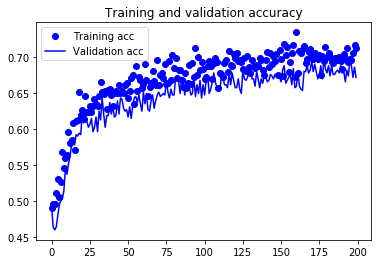

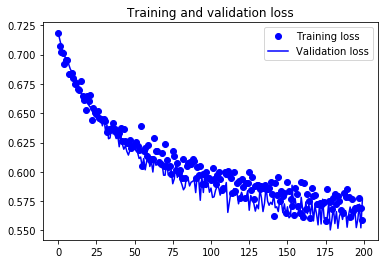

In [152]:
#checking the result of the model.

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [153]:
#To fine tune the model, unfroze last block of the pretrained model since last block contains more complicated data
#that does not apply to most of the images unlike lower level that has edges or other simpler data that can be reused for other classifications
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    elif layer.name == 'block5_conv2':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [154]:
#train the model again with partially unfrozen model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-8),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/150
150/150 [==============================] - 22s 148ms/step - loss: 0.5730 - acc: 0.6971 - val_loss: 0.5589 - val_acc: 0.6856
Epoch 2/150
150/150 [==============================] - 20s 135ms/step - loss: 0.5538 - acc: 0.7212 - val_loss: 0.5641 - val_acc: 0.6815
Epoch 3/150
150/150 [==============================] - 20s 135ms/step - loss: 0.5713 - acc: 0.6954 - val_loss: 0.5635 - val_acc: 0.6714
Epoch 4/150
150/150 [==============================] - 21s 143ms/step - loss: 0.5637 - acc: 0.7212 - val_loss: 0.5640 - val_acc: 0.6836
Epoch 5/150
150/150 [==============================] - 23s 155ms/step - loss: 0.5728 - acc: 0.7038 - val_loss: 0.5621 - val_acc: 0.6775
Epoch 6/150
150/150 [==============================] - 26s 175ms/step - loss: 0.5767 - acc: 0.6924 - val_loss: 0.5591 - val_acc: 0.6775
Epoch 7/150
150/150 [==============================] - 30s 197ms/step - loss: 0.5651 - acc: 0.7001 - val_loss: 0.5713 - val_acc: 0.6795
Epoch 8/150
150/150 [===========================

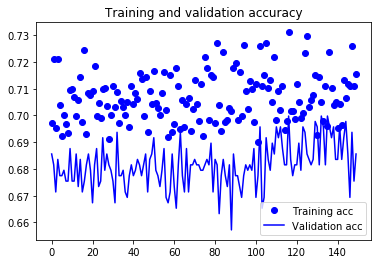

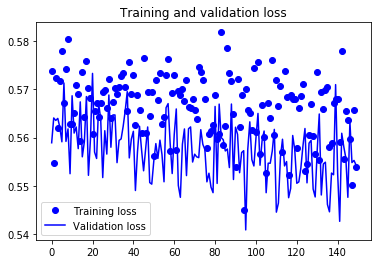

In [155]:
#checking the result of the model.

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [156]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc) 
print('test loss:', test_loss)
#got the about the same accuracy as the validation.

test acc: 0.6786885
test loss: 0.6077135282754899


In [125]:
#saving model for future use
filename = 'model_VGG_finetuned.h5'
model.save(filename)
print('Saved: %s' % filename)

Saved: model_VGG_finetuned.h5
